In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [9]:
# Define column names
columns = ["Variance", "Skewness", "Kurtosis", "Entropy", "Class"]

# Load dataset
df = pd.read_csv("BankNoteAuthentication.csv")

# Display first few rows of the dataset
df.head()


,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [10]:
# Split data into features (X) and target (y)
X = df.drop('class', axis=1)
y = df['class']


In [11]:
# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Initialize Logistic Regression model
log_model = LogisticRegression()

# Train the model on the training data
log_model.fit(X_train, y_train)

# Predict on the test data
y_pred_log = log_model.predict(X_test)


In [13]:
# Print the accuracy of the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))

# Print the classification report
print(classification_report(y_test, y_pred_log))


Logistic Regression Accuracy: 0.9854545454545455
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       148
           1       0.98      0.98      0.98       127

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



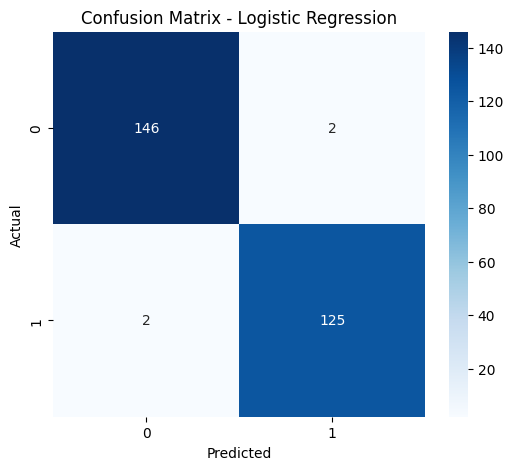

In [14]:
# Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


In [15]:
# Define a function to predict note authenticity
def predict_note_authentication(variance, skewness, kurtosis, entropy):
    sample = np.array([[variance, skewness, kurtosis, entropy]])
    prediction = log_model.predict(sample)
    return "Authentic" if prediction[0] == 1 else "Fake"

# Example prediction
example_prediction = predict_note_authentication(2.3, -1.5, 3.1, -0.8)
print("Predicted Note Authentication:", example_prediction)


Predicted Note Authentication: Fake


d:\Engineering Syllabus\3rd Year Notes\6TH SEM\ML\Codes\myenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
